In [ ]:
import pandas as pd 

# Load data from github

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv

In [ ]:
!ls

sample_data  sbux.csv


In [ ]:
df = pd.read_csv('sbux.csv')
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.92,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.26,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.00,28.275,27.975,28.130,8665592,SBUX


In [ ]:
df.tail(3)

,date,open,high,low,close,volume,Name
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


# Selecting Rows

In [ ]:
len(df)

1259

## loc
You can index the rows by the id column

In [ ]:
df2 = pd.read_csv('sbux.csv',index_col= 'date')

In [ ]:
df2.loc['2013-02-13']

open        28.23
high        28.23
low         27.75
close      27.915
volume    7022056
Name         SBUX
Name: 2013-02-13, dtype: object

## iloc
You index with Integer indexes

In [ ]:
df.iloc[3]

date      2013-02-13
open           28.23
high           28.23
low            27.75
close         27.915
volume       7022056
Name            SBUX
Name: 3, dtype: object

In [ ]:
type(df.iloc[3])

pandas.core.series.Series

In [ ]:
df.iloc[0:2]

,date,open,high,low,close,volume,Name
0,2013-02-08,27.92,28.325,27.92,28.185,7146296,SBUX
1,2013-02-11,28.26,28.260,27.93,28.070,5457354,SBUX


In [ ]:
type(df.iloc[0:3])

pandas.core.frame.DataFrame

# Selecting Columns

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'name'] 
# change the name of the columns

In [ ]:
type(df['date'])

pandas.core.series.Series

In [ ]:
df['date']

0       2013-02-08
1       2013-02-11
2       2013-02-12
3       2013-02-13
4       2013-02-14
           ...    
1254    2018-02-01
1255    2018-02-02
1256    2018-02-05
1257    2018-02-06
1258    2018-02-07
Name: date, Length: 1259, dtype: object

In [ ]:
type(df[['open','close']])
#if it's more than one column, it's already a DataFrame

pandas.core.frame.DataFrame

In [ ]:
df[['open','close']]

,open,close
0,27.920,28.185
1,28.260,28.070
2,28.000,28.130
3,28.230,27.915
4,27.765,27.775
...,...,...
1254,56.280,56.000
1255,55.900,55.770
1256,55.530,54.690
1257,53.685,55.610


# Queries

In [ ]:
df['high'].mean(), df['date'].max(), df['open'].median()

(48.71721215250197, '2018-02-07', 53.52)

In [ ]:
df[df['open'] > 64]

,date,open,high,low,close,volume,name
1087,2017-06-05,64.85,64.870,64.18,64.27,6809284,SBUX
1088,2017-06-06,64.22,64.350,64.05,64.16,5448439,SBUX
1089,2017-06-07,64.13,64.295,63.34,63.50,8364994,SBUX


In [ ]:
type(df['open'] > 64)

pandas.core.series.Series

# Numpy

In [ ]:
df.values

array([['2013-02-08', 27.92, 28.325, ..., 28.185, 7146296, 'SBUX'],
       ['2013-02-11', 28.26, 28.26, ..., 28.07, 5457354, 'SBUX'],
       ['2013-02-12', 28.0, 28.275, ..., 28.13, 8665592, 'SBUX'],
       ...,
       ['2018-02-05', 55.53, 56.26, ..., 54.69, 16059955, 'SBUX'],
       ['2018-02-06', 53.685, 56.06, ..., 55.61, 17415065, 'SBUX'],
       ['2018-02-07', 55.08, 55.43, ..., 54.46, 13927022, 'SBUX']],
      dtype=object)

In [ ]:
A = df[['open','close']].values
type(A)

numpy.ndarray

# Save CSV

In [ ]:
out_df = df[['open','close']]
out_df.to_csv('output.csv',index = False) 
#to remove the default integer index

In [ ]:
!head output.csv

open,close
27.92,28.185
28.26,28.07
28.0,28.13
28.23,27.915
27.765,27.775
27.805,27.17
27.18,27.225
27.3,26.655
26.535,26.675


# Apply Function 

To apply the same operation for each row or column

In [31]:
def from_date_to_year(row):
  return int(row['date'].split('-')[0])

In [33]:

# 0 or 'index': apply function to each column.
# 1 or 'columns': apply function to each row.
df.apply(from_date_to_year,axis = 1 )


0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1254    2018
1255    2018
1256    2018
1257    2018
1258    2018
Length: 1259, dtype: int64

In [35]:
df['year'] = df.apply(from_date_to_year,axis = 1) # add a new column
df.head(3)

,date,open,high,low,close,volume,name,year
0,2013-02-08,27.92,28.325,27.920,28.185,7146296,SBUX,2013
1,2013-02-11,28.26,28.260,27.930,28.070,5457354,SBUX,2013
2,2013-02-12,28.00,28.275,27.975,28.130,8665592,SBUX,2013


# Plot 

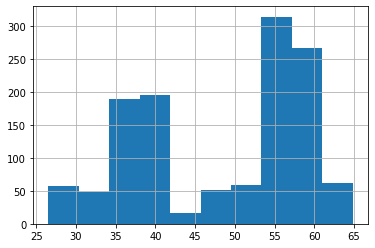

In [37]:
df.open.hist();

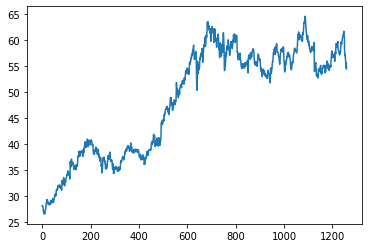

In [40]:
df.close.plot();

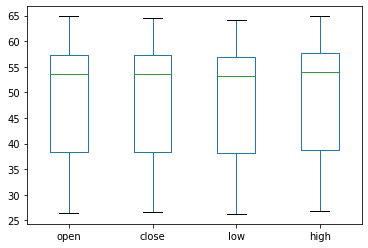

In [43]:
num_columns = ['open','close','low','high']
df[num_columns].plot.box();